In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
scipy: 1.4.1
numpy: 1.18.2
matplotlib: 3.2.1
pandas: 1.0.3
sklearn: 0.22.2.post1


In [0]:

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [4]:
print(dataset.shape)

(150, 5)


In [5]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [15]:
print(dataset.tail(150))

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


<Figure size 432x288 with 0 Axes>

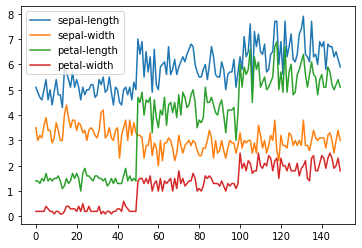

In [27]:
%matplotlib inline
plt.figure(); dataset.plot()

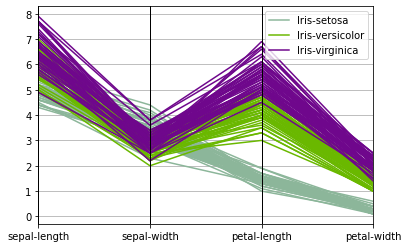

In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
parallel_coordinates(dataset, 'class')


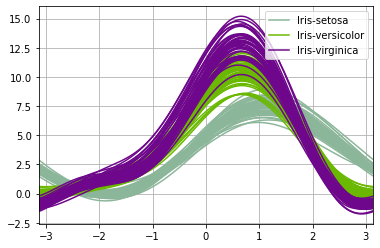

In [35]:
from pandas.plotting import andrews_curves
andrews_curves(dataset,'class')

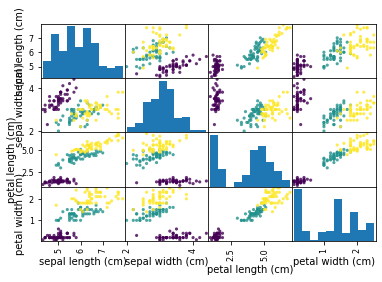

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix

#loading dataset
iris = datasets.load_iris()
#creating data frame for pandas
dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
#ploting scatter graph of species comparing all features to each other
scatter_matrix(dataframe, c=iris['target'],marker='o', s=10,alpha=.8)
plt.show()

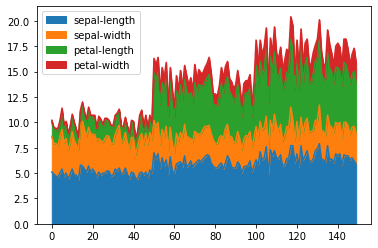

In [64]:
dataset.plot.area()

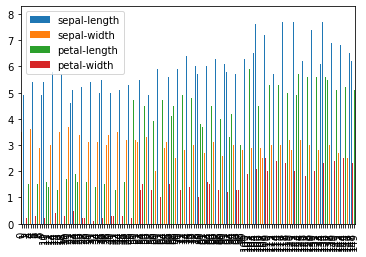

In [66]:
dataset.plot.bar()

In [36]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


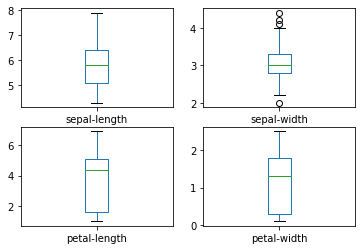

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

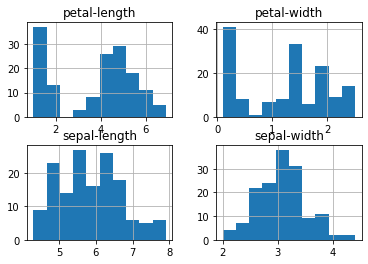

In [9]:
# histograms
dataset.hist()
pyplot.show()

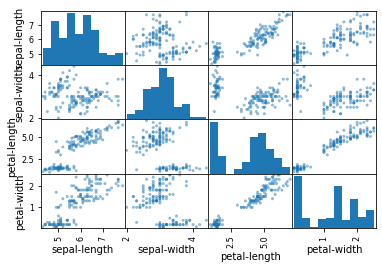

In [10]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [0]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [12]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


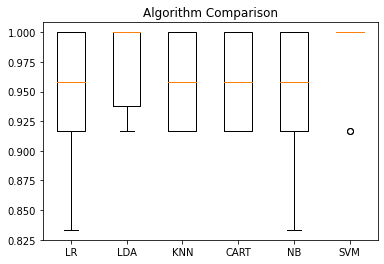

In [13]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

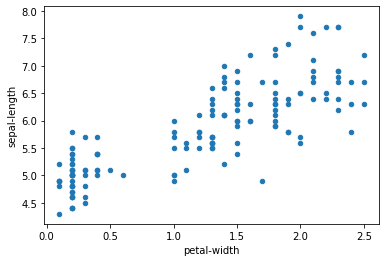

In [68]:
dataset.plot.scatter(x = "petal-width", y = "sepal-length")

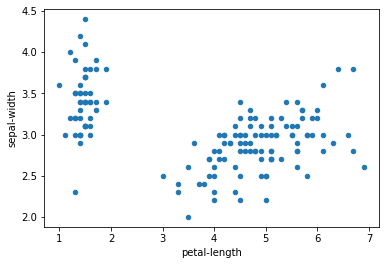

In [69]:
dataset.plot.scatter(x = "petal-length", y = "sepal-width")

In [72]:
dataset.plot.pie('subplots=True')

TypeError: ignored

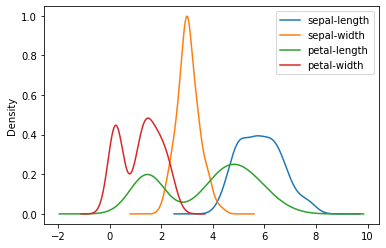

In [73]:
dataset.plot.kde()

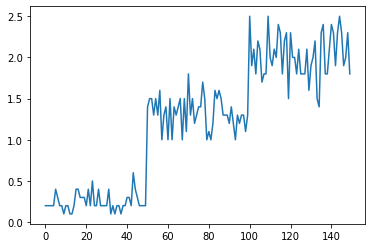

In [78]:
dataset['petal-width'].plot(x_compat=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f97b12bc0b8>,
      dtype=object)

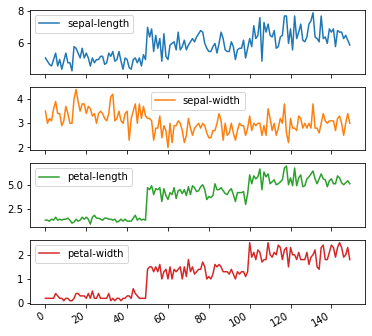

In [79]:
dataset.plot(subplots=True, figsize=(6, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97b1622908>,
      dtype=object)

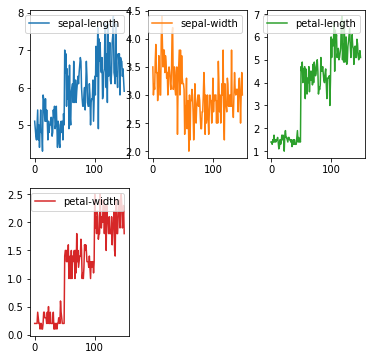

In [80]:
dataset.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False)

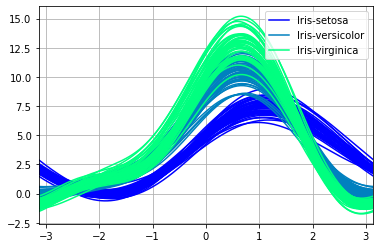

In [83]:
 pyplot.figure()
 andrews_curves(dataset, 'class', colormap='winter')